<font size="7" color="Blue">**Sentiment Analysis** </font>

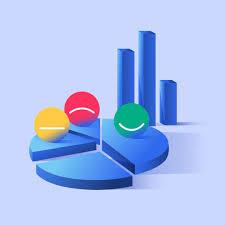





In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/"

In [ ]:
! kaggle competitions download -c  shai-training-2024-a-level-2

 39% 10.0M/25.7M [00:00<00:00, 36.2MB/s]
100% 25.7M/25.7M [00:00<00:00, 70.8MB/s]


In [ ]:
! unzip shai-training-2024-a-level-2.zip

Archive:  shai-training-2024-a-level-2.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: Valid.csv               
  inflating: sample_submission.csv   


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud #Word visualization
import re
import string
import nltk
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score


In [ ]:
train_df = pd.read_csv("/content/Train.csv")
valid_df = pd.read_csv("/content/Valid.csv")
test_df = pd.read_csv("/content/Test.csv")

In [ ]:
train_df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
train_df.shape

(40000, 2)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 40000 entries, 0 to 39999

Data columns (total 2 columns):

 #   Column  Non-Null Count  Dtype 

---  ------  --------------  ----- 

 0   text    40000 non-null  object

 1   label   40000 non-null  int64 

dtypes: int64(1), object(1)

memory usage: 625.1+ KB


In [ ]:
train_df.label.value_counts()

label
0    20019
1    19981
Name: count, dtype: int64

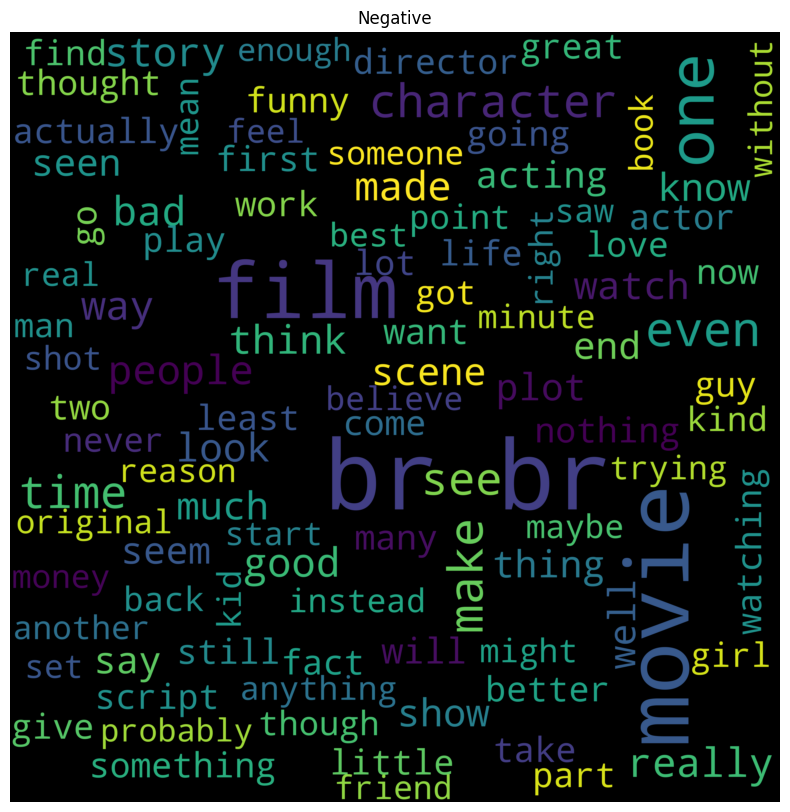

In [ ]:
#Creation of wordcloud
word_cloud_text = train_df[train_df["label"] == 0]["text"].str.cat(sep=" ")
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Negative")
plt.axis("off")
plt.show()

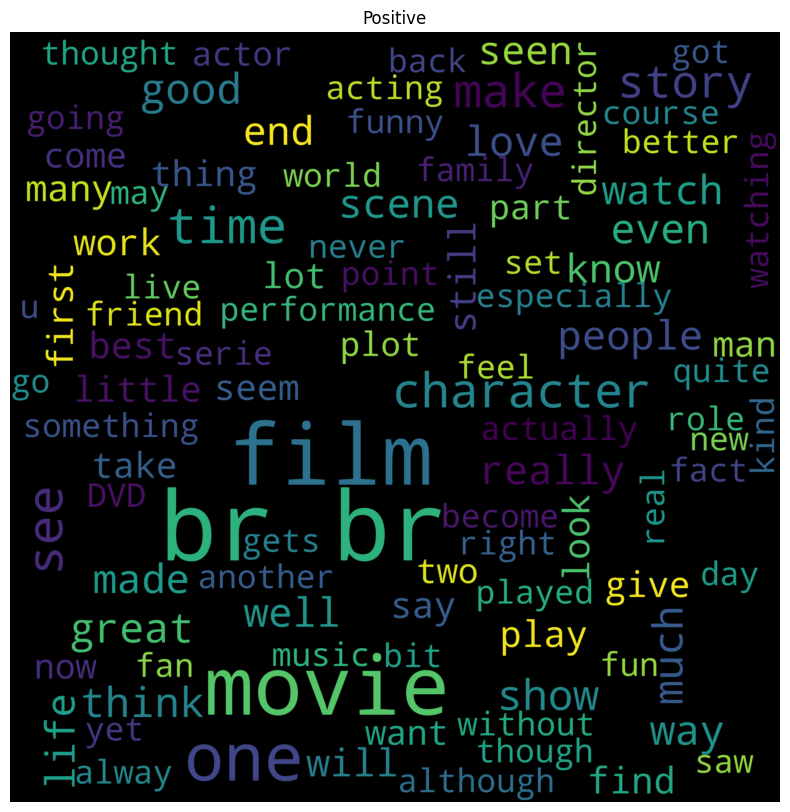

In [ ]:
#Creation of wordcloud
word_cloud_text = train_df[train_df["label"] == 1]["text"].str.cat(sep=" ")
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Positive")
plt.axis("off")
plt.show()

# <font color = "red" > **DATA PREPROCESSING**

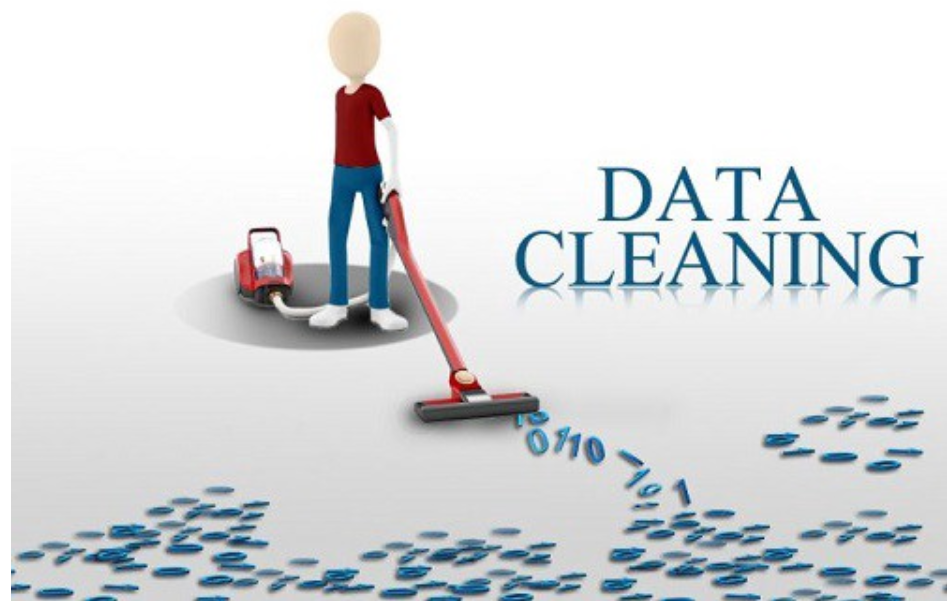

# <font color = "blue">**Lowercasing the text**

In [ ]:
# before
train_df.loc[1, "text"][:50]

'When I put this movie in my DVD player, and sat do'

In [ ]:
# standarize all letters into lowercase
train_df["text"] = train_df["text"].str.lower()
valid_df["text"] = valid_df["text"].str.lower()
test_df["text"] = test_df["text"].str.lower()

In [ ]:
# After
train_df.loc[1, "text"][:50]

'when i put this movie in my dvd player, and sat do'

# <font color = "blue">**Removing URLs**

In [ ]:
# check whether there are URLs

def has_urls(text):
     return bool(re.search(r'http[s]?://\S+', text))

# Find links in the text
found_links = train_df['text'].apply(has_urls)

# Print the found links
print("The number of rows has links = ", (found_links).sum())


The number of rows has links =  88


In [ ]:
# before removing
train_df[found_links]["text"].iloc[0][600:]

'althy and her\'s is not, "problems" develop.<br /><br />it\'s playing on hbo some more times this month. check out the schedule here - http://www.hbo.com/apps/schedule/ scheduleservlet?action_detail=detail&focus_id=598947'

In [ ]:
# Remove URls
def remove_urls(text):
    clean_text = re.sub(r'http[s]?://\S+', '', text)
    return clean_text

# Find links in the text
train_df['text'] = train_df['text'].apply(remove_urls)
valid_df['text'] = valid_df['text'].apply(remove_urls)
test_df['text'] = test_df['text'].apply(remove_urls)

In [ ]:
# after removing
train_df[found_links]["text"].iloc[0][600:]

'althy and her\'s is not, "problems" develop.<br /><br />it\'s playing on hbo some more times this month. check out the schedule here -  scheduleservlet?action_detail=detail&focus_id=598947'

# <font color = "blue">**Remove HTML Tags**

In [ ]:
# Check if HTML tags are found
def has_html_tags(text):
    return bool(re.search('<.*?>', text))

# Check if Message contains HTML tags
has_tags = train_df['text'].apply(has_html_tags)

# Print the result
print("The number of rows has html tags = " , has_tags.sum())


The number of rows has html tags =  23364


In [ ]:
train_df[has_tags]["text"].iloc[0][500:600]

' have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />when t'

In [ ]:
# Remove all HTML tags
def remove_html_tags(text):
    clean_text = re.sub('<.*?>', '', text)
    return clean_text

# Apply remove_html_tags function to each entry in the 'text' column
train_df['text'] = train_df['text'].apply(remove_html_tags)
valid_df['text'] = valid_df['text'].apply(remove_html_tags)
test_df['text'] = test_df['text'].apply(remove_html_tags)

# <font color = "blue">**Remove Emails**

In [ ]:
# check whether there are emails account
def has_email(email):
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'

    # Check if the email matches the pattern
    if re.match(pattern, email):
        return True
    else:
        return False

# Check if the example HTML text contains HTML tags
has_email_messages = train_df['text'].apply(has_email)

print("The number of rows has email account = ", has_email_messages.sum())

The number of rows has email account =  0


# <font color = "blue">**Remove Punctuations**

In [ ]:
# remove Punctuations

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

train_df["text"] = train_df["text"].apply(remove_punctuation)
valid_df["text"] = valid_df["text"].apply(remove_punctuation)
test_df["text"] = test_df["text"].apply(remove_punctuation)


In [ ]:
train_df["text"][0][:150]

'i grew up (b. 1965) watching and loving the thunderbirds. all my mates at school watched. we played "thunderbirds" before school, during lunch and aft'

# <font color = "blue">**Check Existence of Emoji**

In [ ]:
# check whether there are emoji
def has_emoji(text):
    # Define emoji pattern
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    # Check if the text contains emojis
    return bool(emoji_pattern.search(text))

has_emoji_message = train_df["text"].apply(has_emoji)
print("The number of rows has emoji = ", has_emoji_message.sum())

The number of rows has emoji =  0


# <font color = "blue">**Handle Chat Words (abbreviations)**

In [ ]:
# list by chat gpt
chat_words_sentiment = {
    "plz": "please",
    "thx": "thanks",
    "u": "you",
    "r": "are",
    "gr8": "great",
    "lol": "laugh out loud",
    "brb": "be right back",
    "g2g": "got to go",
    "ttyl": "talk to you later",
    "idk": "I don't know",
    "btw": "by the way",
    "omg": "oh my god",
    "rofl": "rolling on the floor laughing",
    "np": "no problem",
    "yw": "you're welcome",
    "sry": "sorry",
    "jk": "just kidding",
    "imo": "in my opinion",
    "tho": "though",
    "wtf": "what the f***",
    "omw": "on my way",
    "idc": "I don't care",
    "hmu": "hit me up",
    "tldr": "too long; didn't read",
    "ftw": "for the win",
    "ic": "I see",
    "2moro": "tomorrow",
    "2nite": "tonight",
    "msg": "message",
    "fb": "Facebook",
    "fyi": "for your information",
    "bbl": "be back later",
    "fomo": "fear of missing out",
    "tbh": "to be honest",
    "irl": "in real life",
    "imho": "in my humble opinion",
    "b2b": "business to business",
    "f2f": "face to face",
    "ftl": "for the loss",
    "wcw": "woman crush Wednesday",
    "mcm": "man crush Monday",
    "tgif": "thank God it's Friday",
    "fomo": "fear of missing out",
    "lol": "laugh out loud",
    "rofl": "rolling on the floor laughing",
    "lmao": "laughing my ass off",
    "lmfao": "laughing my f***ing ass off",
    "bff": "best friends forever",
    "btwn": "between",
    "icymi": "in case you missed it",
    "pov": "point of view",
    "wb": "welcome back",
    "af": "as f***",
    "cuz": "because",
    "fml": "f*** my life",
    "ttyl": "talk to you later",
    "cya": "see you",
    "gmta": "great minds think alike",
    "nbd": "no big deal",
    "nm": "not much",
    "nvm": "never mind",
    "thx": "thanks",
    "tnx": "thanks",
    "tx": "thanks",
    "pls": "please",
    "plz": "please",
    "txs": "thanks",
    "tks": "thanks",
    "gracias": "thanks",
    "tyvm": "thank you very much",
    "yw": "you're welcome",
    "wlc": "welcome",
    "bc": "because",
    "tho": "though",
    "til": "today I learned",
    "afaik": "as far as I know",
    "nvm": "never mind",
    "wut": "what",
    "yolo": "you only live once",
    "omg": "oh my god",
    "jk": "just kidding",
    "gtg": "got to go",
    "omw": "on my way",
    "ppl": "people",
    "idk": "I don't know",
    "ty": "thank you",
    "np": "no problem",
    "btw": "by the way",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "icymi": "in case you missed it",
    "b4": "before",
    "cya": "see you",
    "f2f": "face to face",
    "g2g": "got to go",
    "jk": "just kidding",
    "l8r": "later",
    "omg": "oh my god",
    "rofl": "rolling on the floor laughing",
}


In [ ]:
def has_chat_word(text):
    for word in text.split():
        if word.lower() in chat_words_sentiment:
            return True
    return False
has_abb = train_df["text"].apply(has_chat_word)
print("number of rows has abbreviations : ", has_abb.sum())

number of rows has abbreviations :  641


In [ ]:
# Replace abbreviations with Original words
def has_chat_word(text):
    for word in text.split():
        if word in chat_words_sentiment:
            text = text.replace(word, chat_words_sentiment[word])
    return text
train_df["text"] = train_df["text"].apply(has_chat_word)
valid_df["text"] = valid_df["text"].apply(has_chat_word)
test_df["text"] = test_df["text"].apply(has_chat_word)

# <font color = "blue">**Remove Numbers**

In [ ]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

train_df["text"] = train_df["text"] .apply(remove_numbers)
valid_df["text"] = valid_df["text"] .apply(remove_numbers)
test_df["text"] = test_df["text"] .apply(remove_numbers)

# <font color = "blue" >**Remove Stop Words**

In [ ]:
# remove stop words except the negation ones

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Define a list of negation words
negation_words = set(['not', 'no', 'never', 'none'])

# Define a function to remove stop words except for negation words
def remove_stop_words_except_negation(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Get NLTK English stop words
    stop_words = set(stopwords.words('english'))

    # Remove stop words except negation words
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words or token.lower() in negation_words]

    # Join the filtered tokens back into a single string
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text


# Remove stop words except negation words from the 'text' column
train_df['text'] = train_df['text'].apply(remove_stop_words_except_negation)
valid_df['text'] = valid_df['text'].apply(remove_stop_words_except_negation)
test_df['text'] = test_df['text'].apply(remove_stop_words_except_negation)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# remove_single_chars
def remove_single_chars(text):
    clean_text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    return clean_text

# Apply single chars function to each entry in the 'text' column
train_df['text'] = train_df['text'].apply(remove_single_chars)
valid_df['text'] = valid_df['text'].apply(remove_single_chars)
test_df['text'] = test_df['text'].apply(remove_single_chars)

In [ ]:
# Remove words not in dictionary (unexpressed ones)
# Download NLTK resources (if not already downloaded)
nltk.download('words')

# Load NLTK words corpus
word_corpus = set(words.words())

# Function to check if a word is in the dictionary
def is_word_in_dictionary(word):
    return word in word_corpus

# Apply the function to each word in the 'text' column
train_df["text"] = train_df["text"].apply(lambda x: " ".join([word for word in x.split() if is_word_in_dictionary(word)]))
valid_df["text"] = valid_df["text"].apply(lambda x: " ".join([word for word in x.split() if is_word_in_dictionary(word)]))
test_df["text"] = test_df["text"].apply(lambda x: " ".join([word for word in x.split() if is_word_in_dictionary(word)]))

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


# <font color = "blue" >**Lemmatization**

In [ ]:
# Tokenization function
def tokenize_text(text):
    return word_tokenize(text)
# Apply tokenization function to each row of the DataFrame
train_df['Tokens'] = train_df['text'].apply(tokenize_text)
valid_df['Tokens'] = valid_df['text'].apply(tokenize_text)
test_df['Tokens'] = test_df['text'].apply(tokenize_text)


In [ ]:
print(nltk.data.path)

['/root/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [ ]:
! unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
# Lemmatization function
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

#  lemmatization function to each row of the DataFrame
train_df['Lemmatized'] = train_df['Tokens'].apply(lemmatize_text)
valid_df['Lemmatized'] = valid_df['Tokens'].apply(lemmatize_text)
test_df['Lemmatized'] = test_df['Tokens'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train_df.head()

,text,label,Tokens,Lemmatized
0,grew watching loving school watched school lun...,0,"[grew, watching, loving, school, watched, scho...","[grew, watching, loving, school, watched, scho..."
1,put movie player sat coke chips movie would co...,0,"[put, movie, player, sat, coke, chips, movie, ...","[put, movie, player, sat, coke, chip, movie, w..."
2,people not know particular time past like feel...,0,"[people, not, know, particular, time, past, li...","[people, not, know, particular, time, past, li..."
3,even though great interest death every minute ...,0,"[even, though, great, interest, death, every, ...","[even, though, great, interest, death, every, ..."
4,die hard army fan nothing ever change got ever...,1,"[die, hard, army, fan, nothing, ever, change, ...","[die, hard, army, fan, nothing, ever, change, ..."


In [ ]:
# Convert token lists back to text
train_df['text'] = train_df['Lemmatized'].apply(lambda lemma: ' '.join(lemma))
train_df.drop(columns=['Tokens', "Lemmatized"], inplace=True)
test_df['text'] = test_df['Lemmatized'].apply(lambda lemma: ' '.join(lemma))
test_df.drop(columns=['Tokens', "Lemmatized"], inplace=True)
valid_df['text'] = valid_df['Lemmatized'].apply(lambda lemma: ' '.join(lemma))
valid_df.drop(columns=['Tokens', "Lemmatized"], inplace=True)

In [ ]:
train_df.head()

,text,label
0,grew watching loving school watched school lun...,0
1,put movie player sat coke chip movie would con...,0
2,people not know particular time past like feel...,0
3,even though great interest death every minute ...,0
4,die hard army fan nothing ever change got ever...,1


# <font color = "blue">**TF-IDF**

In [ ]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(train_df['text'])

# Print the shape of the TF-IDF matrix
print('Tfidf_train:',tfidf_matrix.shape)


Tfidf_train: (40000, 29400)


In [ ]:
tfidf_matrix_test = vectorizer.transform(test_df['text'])
tfidf_matrix_valid = vectorizer.transform(valid_df['text'])

In [ ]:
tfidf_valid = pd.DataFrame(tfidf_matrix_valid.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_test = pd.DataFrame(tfidf_matrix_test.toarray(), columns=vectorizer.get_feature_names_out())


In [ ]:
tfidf_valid_y = valid_df["label"]

In [ ]:
print("Validation set : ", tfidf_valid.shape)
print("Test set : ", tfidf_test.shape)

Validation set :  (5000, 29400)
Test set :  (5000, 29400)


In [ ]:
# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head()

,aa,aardvark,aba,aback,abandon,abandoned,abandonment,abashed,abbas,abbasi,...,zone,zoned,zonelike,zoning,zoo,zoological,zoologist,zoology,zoom,zorro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_df.shape

(40000, 29400)

In [ ]:
# Function to calculate percentage of zeros in a column
def percent_zeros(column):
    return ((column == 0).mean() * 100) > 0.8

# Calculate percentage of zeros in each column
percent_zeros_series = tfidf_df.apply(percent_zeros)

# Display the result
print("Percentage of zeros in each column:")
print(percent_zeros_series.sum())

# <font color = "blue">**MODELING - Traditional Models**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier


In [ ]:
x_train = tfidf_df
y_train = train_df["label"]

In [ ]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=15,random_state=42)
rf_classifier.fit(x_train, y_train)



RandomForestClassifier(max_depth=15, n_estimators=300, random_state=42)

In [ ]:
# Making predictions on the test set
predictions = rf_classifier.predict(tfidf_valid)

# Evaluating the classifier
accuracy = accuracy_score(tfidf_valid_y, predictions)
print("Accuracy:", accuracy)

# Generating classification report
class_report = classification_report(tfidf_valid_y, predictions)
print("Classification Report:\n", class_report)

Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      2486
           1       0.81      0.88      0.85      2514

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



In [ ]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# use this lib for save model
import joblib


In [ ]:
# save the model
joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
# load the model
loaded_model = joblib.load('/random_forest_model.pkl')


In [ ]:
# predict labels for validation data
predictions = loaded_model.predict(tfidf_valid)


In [ ]:
# predict labels for testing data
test_labels = loaded_model.predict(tfidf_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(tfidf_valid_y, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8432


In [ ]:
test_labels

array([0, 0, 0, ..., 1, 0, 1])

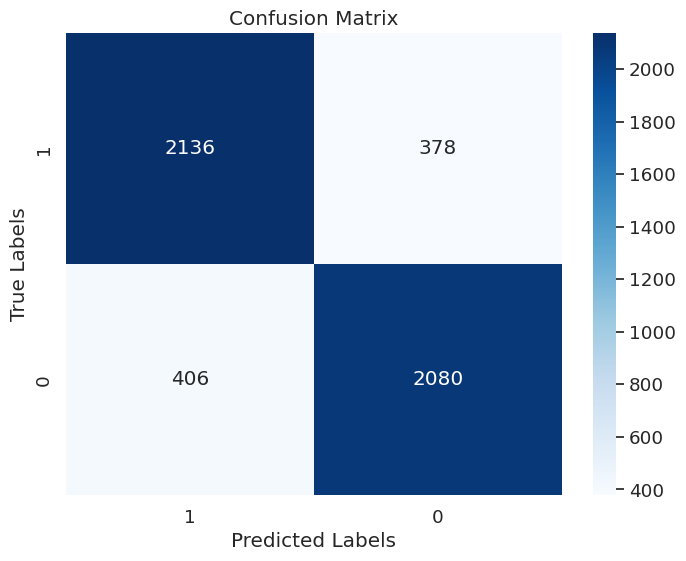

In [ ]:
# Random Forest Confusion Matrix
# Define class labels
class_labels = [1, 0]

# Compute confusion matrix
conf_matrix = confusion_matrix(tfidf_valid_y, predictions, labels=class_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#  Bernoulli Naive Bayes model
BNBmodel = BernoulliNB()

# Train the model
BNBmodel.fit(x_train, y_train)



BernoulliNB()

In [ ]:
# Predict labels for validation set
y_pred = BNBmodel.predict(tfidf_valid)

# Calculate accuracy of validation set
accuracy = accuracy_score(tfidf_valid_y, y_pred)


In [ ]:
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 85.30%


In [ ]:
# Setting parameters for XGBoost
param = {
    'max_depth': 10,  # maximum depth of a tree
    'eta': 0.1,  # learning rate
    'objective': 'binary:logistic',  # binary classification
    'eval_metric': 'logloss',  # evaluation metric
    'seed': 42  # random seed
}

# Training the XGBoost model
xgb = XGBClassifier(**param)
bst = xgb.fit(x_train, y_train)

In [ ]:
# Making predictions on the valid set
y_pred_valid = bst.predict(tfidf_valid)

# Making predictions on the test set
y_pred_test = bst.predict(tfidf_valid)
# Evaluating the classifier
accuracy = accuracy_score(tfidf_valid_y, y_pred_valid)
print("Accuracy:", accuracy)

# Generating classification report
class_report = classification_report(tfidf_valid_y, y_pred_valid)
print("Classification Report:\n", class_report)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming you have your training and testing data prepared: x_train, y_train, x_test, y_test

# Creating an instance of Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # You can adjust max_iter as needed

# Training the Logistic Regression model
log_reg.fit(x_train, y_train)




Accuracy: 0.8704
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.46      0.45      2303
           1       0.53      0.51      0.52      2697

    accuracy                           0.49      5000
   macro avg       0.49      0.49      0.49      5000
weighted avg       0.49      0.49      0.49      5000



In [ ]:
# Making predictions on the test set
predictions = log_reg.predict(tfidf_valid)

# Evaluating the classifier
accuracy = accuracy_score(tfidf_valid_y, predictions)
print("Accuracy:", accuracy)

# Generating classification report
class_report = classification_report(tfidf_valid_y, predictions)
print("Classification Report:\n", class_report)

Accuracy: 0.8704
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      2486
           1       0.86      0.89      0.87      2514

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



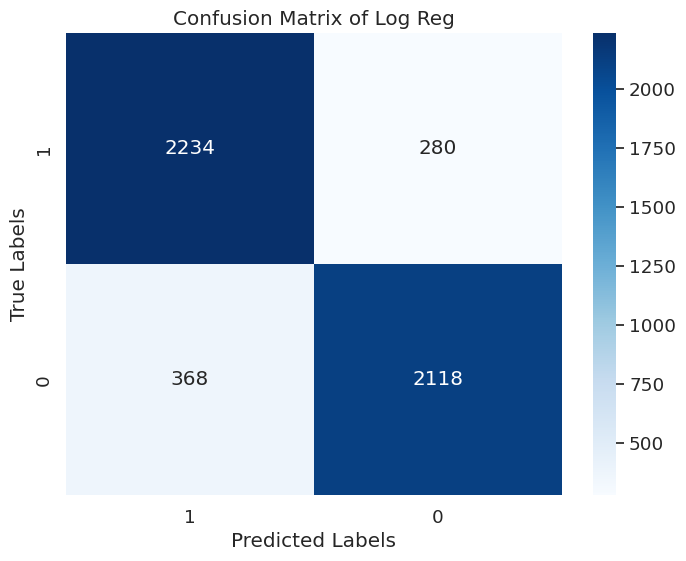

In [ ]:
# Define class labels
class_labels = [1, 0]

# Compute confusion matrix
conf_matrix = confusion_matrix(tfidf_valid_y, predictions, labels=class_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Log Reg')
plt.show()

In [ ]:
y_pred =  log_reg.predict(tfidf_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create individual classifiers
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Create a Voting Classifier with majority voting
voting_classifier = VotingClassifier(estimators=[('rf', random_forest), ('lr', logistic_regression)], voting='hard')

# Train the Voting Classifier
voting_classifier.fit(x_train, y_train)

# Make predictions using the Voting Classifier
predictions_voting = voting_classifier.predict(tfidf_valid)

# Evaluate the performance of the Voting Classifier
accuracy_voting = accuracy_score(tfidf_valid_y, predictions_voting)
print("Accuracy (Voting Classifier):", accuracy_voting)

# Generate classification report for the Voting Classifier
class_report_voting = classification_report(tfidf_valid_y, predictions_voting)
print("Classification Report (Voting Classifier):\n", class_report_voting)


Accuracy (Voting Classifier): 0.8558
Classification Report (Voting Classifier):
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      2486
           1       0.89      0.82      0.85      2514

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



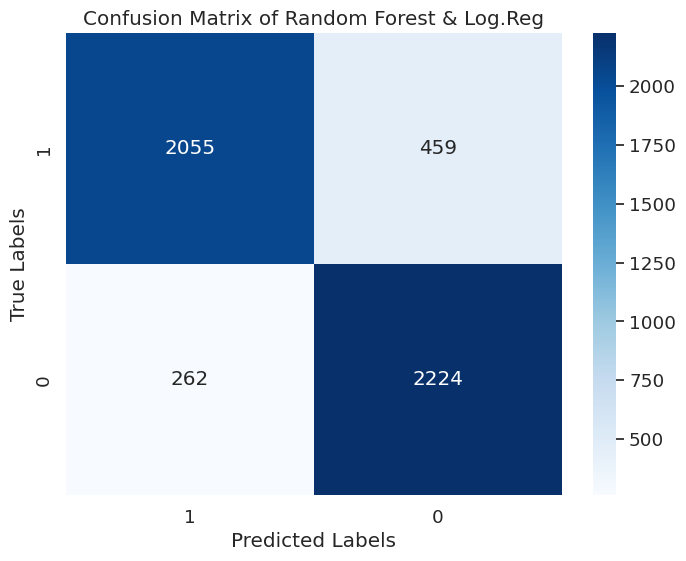

In [ ]:
from sklearn.metrics import confusion_matrix


# Define class labels
class_labels = [1, 0]

# Compute confusion matrix
conf_matrix = confusion_matrix(tfidf_valid_y, predictions_voting, labels=class_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Random Forest & Log.Reg')
plt.show()

In [ ]:
y_pred = voting_classifier.predict(tfidf_test)

In [ ]:
d = pd.read_csv("/submission/sample_submission (2).csv")

In [ ]:
d.head()

,id,label
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [ ]:
d["label"] = y_pred

In [ ]:
d.to_csv('sample_submissionlstmmod.csv', index=False)

# <font color = "blue">**LSTM Algorithm**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, SpatialDropout1D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


2024-05-16 06:09:05.840009: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 06:09:05.840138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 06:09:05.930937: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
train_df["length_text"] = train_df.text.apply(lambda text: len(text))

In [ ]:
train_df.head()

,text,label,length_text
0,grew watching loving school watched school lun...,0,386
1,put movie player sat coke chip movie would con...,0,793
2,people not know particular time past like feel...,0,461
3,even though great interest death every minute ...,0,174
4,die hard army fan nothing ever change got ever...,1,493


In [ ]:
train_df["length_text"].describe()

count    40000.000000
mean       828.979575
std        640.818133
min         17.000000
25%        433.000000
50%        610.000000
75%       1011.000000
max       9166.000000
Name: length_text, dtype: float64

In [ ]:
pos_length = train_df[train_df["label"] == 1]["length_text"]
neg_length = train_df[train_df["label"] == 0]["length_text"]

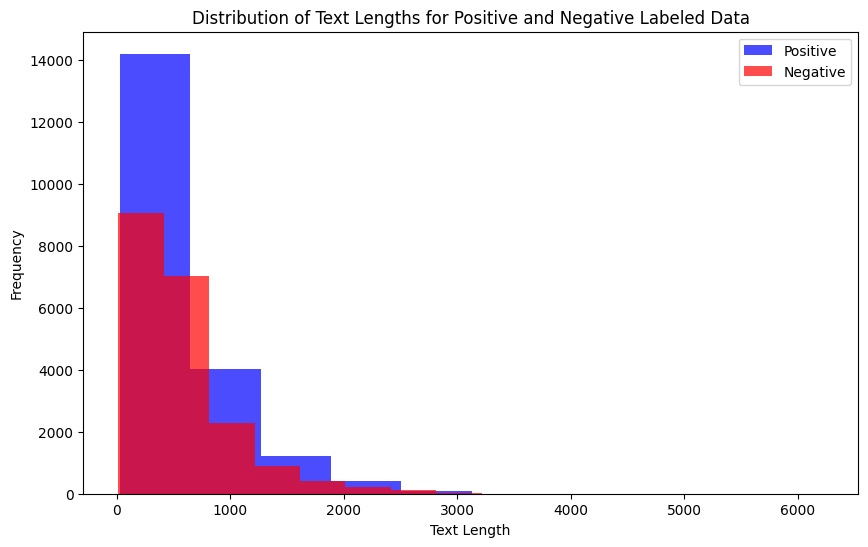

In [ ]:
# Plot histograms
plt.figure(figsize=(10, 6))

# Histogram for positive labeled data
plt.hist(pos_length, color='blue', alpha=0.7, label='Positive')

# Histogram for negative labeled data
plt.hist(neg_length, color='red', alpha=0.7, label='Negative')

# Add labels and title
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths for Positive and Negative Labeled Data')
plt.legend()

# Show plot
plt.show()

In [ ]:
max_sequence_length = 800
# Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['text'])
x= tokenizer.texts_to_sequences(train_df['text'])
x = pad_sequences(x, maxlen=max_sequence_length)

In [ ]:
# Tokenize and pad testing data
x_test = tokenizer.texts_to_sequences(test_df['text'])
x_test = pad_sequences(x_test, maxlen=max_sequence_length)

# Tokenize and pad validation data
x_val = tokenizer.texts_to_sequences(valid_df['text'])
x_val = pad_sequences(x_val, maxlen=max_sequence_length)

In [ ]:
x[:5]

array([[   0,    0,    0, ...,  500, 2573, 4853],
       [   0,    0,    0, ...,  891, 5699,  150],
       [   0,    0,    0, ...,  178,    2, 2008],
       [   0,    0,    0, ...,  514,  151,  102],
       [   0,    0,    0, ...,   13,   53,  721]], dtype=int32)

In [ ]:
y = train_df["label"]

In [ ]:
y_test = test_df["label"]
y_val = valid_df["label"]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50

In [ ]:
# Define LSTM model with regularization and dropout
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model with validation data
history = model.fit(x, y, epochs=5, batch_size=64, validation_data=(x_val, y_val))
print(history)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 502s 795ms/step - accuracy: 0.7248 - loss: 0.7280 - val_accuracy: 0.8676 - val_loss: 0.3437
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 496s 794ms/step - accuracy: 0.8815 - loss: 0.3210 - val_accuracy: 0.8594 - val_loss: 0.3442
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 497s 796ms/step - accuracy: 0.9049 - loss: 0.2704 - val_accuracy: 0.8662 - val_loss: 0.3345
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 501s 801ms/step - accuracy: 0.9214 - loss: 0.2296 - val_accuracy: 0.8678 - val_loss: 0.3371
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 500s 801ms/step - accuracy: 0.9308 - loss: 0.2073 - val_accuracy: 0.8446 - val_loss: 0.4723


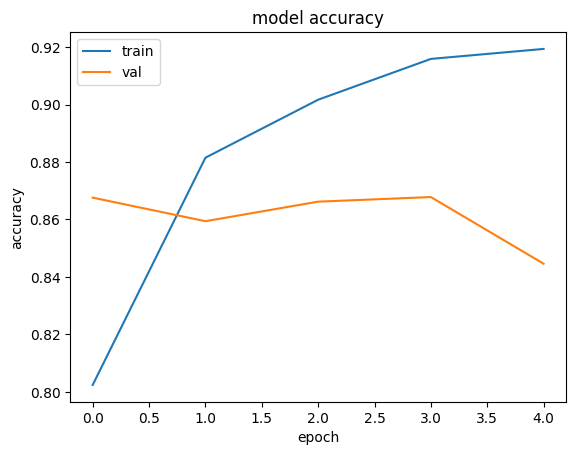

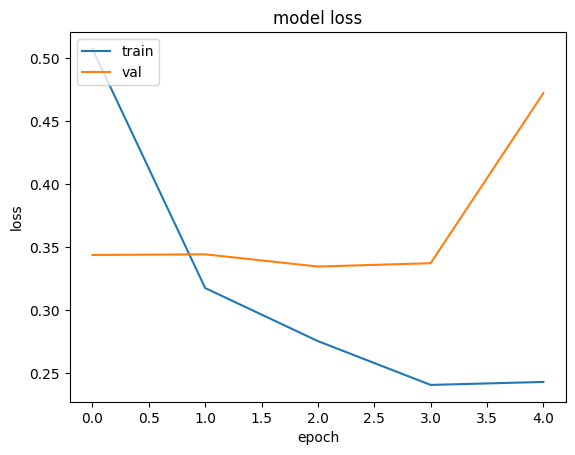

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
predicted_probabilities = model.predict(x_test)
predicted_labels = (predicted_probabilities > 0.5).astype('int')  # Convert probabilities to binary labels

# Display predicted labels
print("Predicted Labels:", predicted_labels)

157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 274ms/step
Predicted Labels: [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

In [ ]:
# Define LSTM model with regularization and dropout
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim= embedding_dim, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model with validation data
history = model.fit(x, y, epochs=5, batch_size=64, validation_data=(x_val, y_val))
print(history)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 546s 871ms/step - accuracy: 0.7369 - loss: 0.8341 - val_accuracy: 0.8516 - val_loss: 0.3910
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 544s 870ms/step - accuracy: 0.8840 - loss: 0.3153 - val_accuracy: 0.8542 - val_loss: 0.3766
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 544s 871ms/step - accuracy: 0.9053 - loss: 0.2672 - val_accuracy: 0.8592 - val_loss: 0.3518
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 544s 871ms/step - accuracy: 0.9202 - loss: 0.2313 - val_accuracy: 0.8582 - val_loss: 0.3470
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 544s 870ms/step - accuracy: 0.9289 - loss: 0.2131 - val_accuracy: 0.8548 - val_loss: 0.3607


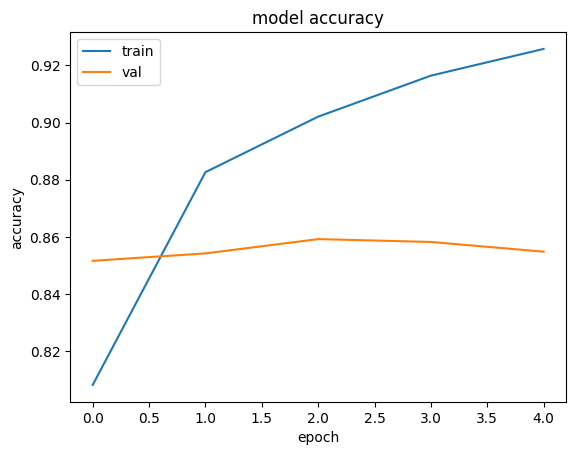

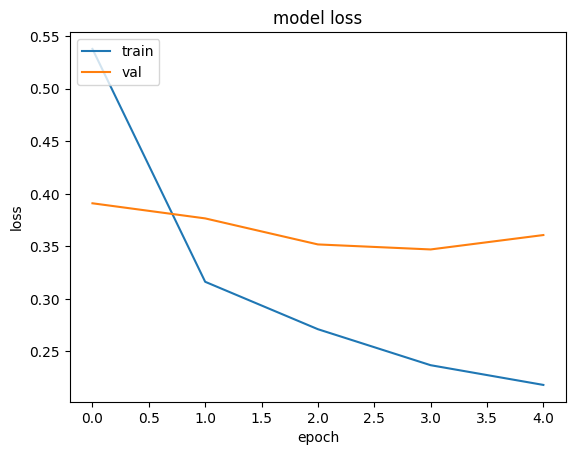

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
predicted_probabilities = model.predict(x_test)
predicted_labels = (predicted_probabilities > 0.5).astype('int')  # Convert probabilities to binary labels

# Display predicted labels
print("Predicted Labels:", predicted_labels)

157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 278ms/step
Predicted Labels: [[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
d["label"] = predicted_labels.flatten()